In [1]:
import numpy as np
import torch 
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F

Define the target funtion

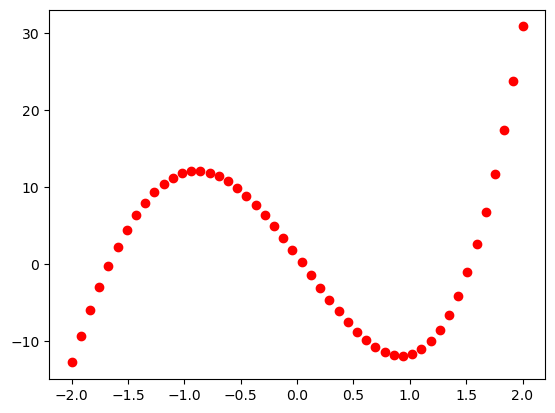

In [26]:
def target(x):
    return x**4+5*x**3-2*x**2+1-20*np.sin(x)

x = np.linspace(-2,2,50)
y = target(x)
plt.plot(x,y,'ro')

In [27]:
x_t = torch.tensor(x,dtype=torch.float32)
y_t = torch.tensor(y,dtype=torch.float32)
x_t = x_t.view(x_t.shape[0],1)
y_t = y_t.view(y_t.shape[0],1)

Set up the Network

In [15]:
class Net(nn.Module):
    def __init__(self,D_in,H_1,H_2,D_out):
        super(Net,self).__init__()
        self.linear1=nn.Linear(D_in,H_1)
        self.linear2=nn.Linear(H_1,H_2)
        self.linear3=nn.Linear(H_2,D_out)

        
    def forward(self,x):
        x=torch.relu(self.linear1(x))  
        x=torch.relu(self.linear2(x))  
        x=self.linear3(x) 
        return x

Train the Network

In [28]:
learning_rate,num_epochs    = 0.0001,10000
model                       = Net(1,50,50,1)
loss                        = nn.MSELoss()
optimizer                    = torch.optim.SGD(model.parameters(),lr=learning_rate)

Loss = np.array([])

for epoch in range(num_epochs):
    y_pred = model.forward(x_t)
    l = loss(y_pred,y_t)
    l.backward()
    optimizer.step()
    optimizer.zero_grad()


    if(epoch+1)%1000==0:
        print(f'epoch:{epoch+1},loss={l.item():.3f}')
    
    
    

epoch:1000,loss=97.127
epoch:2000,loss=89.242
epoch:3000,loss=70.083
epoch:4000,loss=34.606
epoch:5000,loss=11.608
epoch:6000,loss=5.622
epoch:7000,loss=3.194
epoch:8000,loss=2.019
epoch:9000,loss=1.372
epoch:10000,loss=0.974


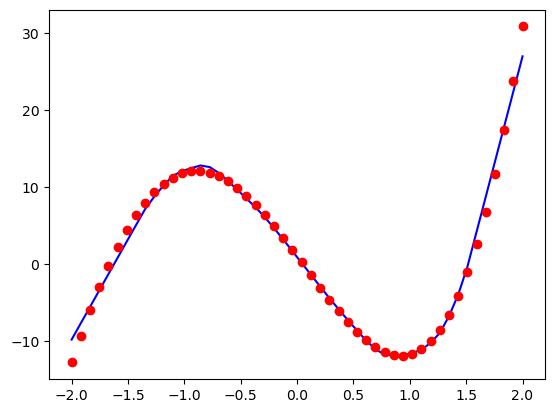

In [29]:
predicted = model(x_t).detach().numpy()
plt.plot(x_t,predicted,'b')
plt.plot(x_t,y_t,'ro')
plt.show()